In [1]:
%load_ext autoreload
%autoreload 2

In [205]:
from useful_scit.imps import *
import flexpart_management.modules.FlexLogPol as FLP
import flexpart_management.modules.constants as co
import flexpart_management.modules.flx_array as fa
import pandas as pd

In [3]:
path = '/Volumes/mbProD/Downloads/flx_log_coor/run_2019-06-05_18-42-11_'
path = '/Volumes/mbProD/Downloads/flx_log_coor/run_2019-06-10_11-10-03_'
# flp = FLP.FlexLogPol(path,concat=True)
# self = FLP.FlexLogPol(path,concat=False)
self = FLP.FlexLogPol(
    path,
#     concat=True,
    concat=False,
    get_clusters=False,
    open_merged=True,
    clusters_avail=False
)

'using vol for conc'


In [4]:
self.reset_z_levels()

'using vol for conc'


In [5]:
self.python_cluster(n_cluster=15)

In [6]:
i = 5 

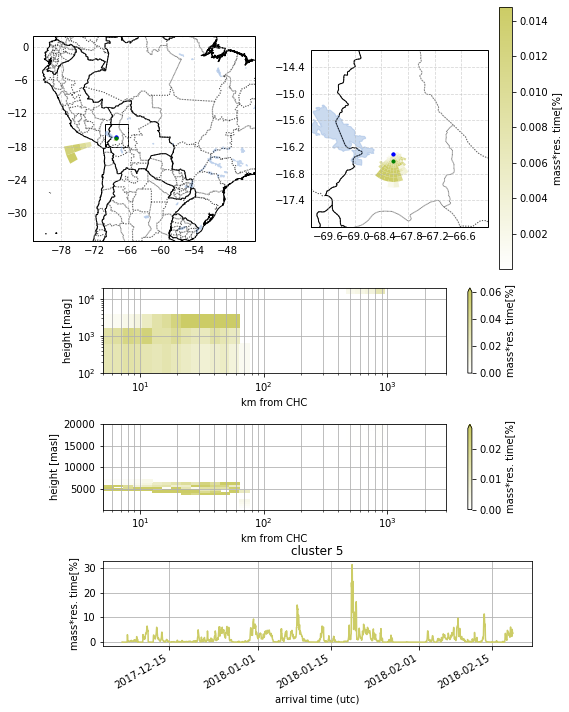

In [80]:
fig = self.plot_cluster_grid(i=i,par_to_plot=co.CPer)

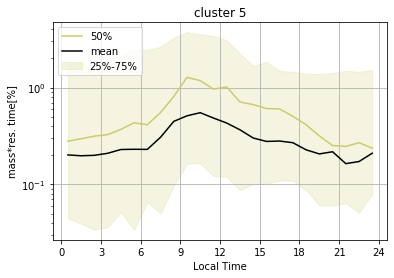

In [158]:
i=5
self.plot_hout_influence(i)

In [159]:
path_bc = '/Users/diego/JUP/co_bc/data/horiba_chc_corrected_diego.csv'

In [206]:
bc,CO,h  = 'abs670','CO_ppbv','hour'
lh = 'Local Time'
dt = 'date'
df = pd.read_csv(path_bc)
df[lh]=np.mod(df[h]-4,24)

In [207]:
df[dt] = pd.to_datetime(df[dt])
df = df.set_index(dt)

In [208]:
desc = df.groupby(lh)[bc].describe()

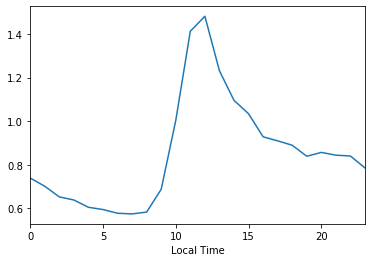

In [209]:
desc['50%'].plot()

In [212]:
ds = self.merged_ds.where(self.merged_ds[co.FLAGS]==i)

In [290]:
ds1 = ds.groupby(co.RL).sum()

In [299]:
dfF = ds1.to_dataframe().drop(columns=lt)

In [301]:
res = pd.merge(df,dfF,left_index=True,right_index=True)[[bc,co.CPer,CO,lh]]

In [314]:
p1,p2,p3 = ['25%','50%','75%']
desc = res.groupby(lh)[bc].describe()

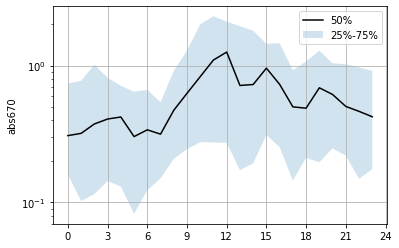

In [333]:
fig,ax = plt.subplots()
ax.plot(desc[p2],color='k',label=p2)
ax.fill_between(desc.index,desc[p1],desc[p3],alpha=.2,label='{}-{}'.format(p1,p3))
ax.grid(True)
ax.legend()
tickrange = np.arange(0,25,3)
ax.set_xticks(tickrange);
ax.set_ylabel(bc)
ax.set_yscale('log')


In [326]:
ax.legend()